In [39]:
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.python.keras.backend import learning_phase
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



In [40]:
num_classes = 8

model = tf.keras.models.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(128,128, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

def classification(x_train,y_train,model,path="output"):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])
    
    model.fit(x_train, y_train, epochs=10, validation_split=0.1)
    model.save(path+'/model')

def loadData(path="output"):
    '''
    Loads the data to be used by the classifiers
    '''
    pickle_in = open(path+"/X.pickle", "rb")
    X = pickle.load(pickle_in)
    pickle_in = open(path+"/y.pickle", "rb")
    y = pickle.load(pickle_in)
    pickle_in = open(path+"/data.pickle", "rb")
    data = pickle.load(pickle_in)

    return X,y,data

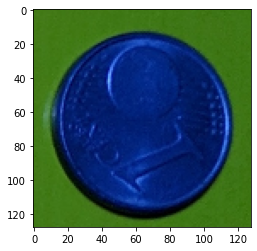

Training Size: 6740
Testing  Size: 1685


In [41]:
X,y,_ = loadData()
plt.imshow(X[3])
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Training Size:', len(X_train))
print('Testing  Size:', len(X_test))

In [42]:
classification(np.asarray(X_train),np.asarray(y_train),model)

Epoch 1/10
190/190 [==============================] - 41s 216ms/step - loss: 0.8051 - accuracy: 0.6866 - val_loss: 0.4498 - val_accuracy: 0.8190
Epoch 2/10
190/190 [==============================] - 40s 209ms/step - loss: 0.3248 - accuracy: 0.8688 - val_loss: 0.2451 - val_accuracy: 0.9095
Epoch 3/10
190/190 [==============================] - 41s 214ms/step - loss: 0.1995 - accuracy: 0.9286 - val_loss: 0.1789 - val_accuracy: 0.9347
Epoch 4/10
190/190 [==============================] - 41s 218ms/step - loss: 0.1272 - accuracy: 0.9533 - val_loss: 0.1887 - val_accuracy: 0.9243
Epoch 5/10
190/190 [==============================] - 41s 218ms/step - loss: 0.0858 - accuracy: 0.9710 - val_loss: 0.0843 - val_accuracy: 0.9659
Epoch 6/10
190/190 [==============================] - 41s 215ms/step - loss: 0.0836 - accuracy: 0.9725 - val_loss: 0.2146 - val_accuracy: 0.9303
Epoch 7/10
190/190 [==============================] - 41s 216ms/step - loss: 0.0733 - accuracy: 0.9723 - val_loss: 0.0548 - val_ac

In [43]:
results = model.evaluate(np.asarray(X_test),np.asarray(y_test))
print(results)

53/53 [==============================] - 4s 79ms/step - loss: 0.0508 - accuracy: 0.9840
[0.05078214779496193, 0.9839762449264526]
